# Pointing Technique Study

## Design and Procedure

We conduct a study in which we measure the task completion time of a user to click the correct circle under different conditions. For this purpose, we created an app that displays several randomly placed circles and a highlighted target that has to be clicked on.

The conditions are presented in a counter-balanced order (Balanced Latin Squares):
- The user gets 20 big circles with radius 100 pixels and no distractions
- The user gets 75 small circles with radius 50 pixels and no distractions
- The user gets 20 big circles with radius 100 pixels and with color flicker of circles
- The user gets 75 small circles with radius 50 pixels and color flicker of circles
- The user gets 20 big circles with radius 100 pixels and color flicker of circles as well as background 
- The user gets 75 small circles with radius 50 pixels and color flicker of circles as well as background

All parameters, such as the radius of the circles, the number of circles, the color of the circles, the target and the background, as well as whether the condition is carried out with distractions or without, are defined in a config file which is read in through console parameters. In our test, the circles were colored black, the target red and the background orange. The color for the flicker was yellow. The previous parameters of the conditions (radius and number of circles) were set by us for the study but can be changed.

The study starts with an information text that defines the color of the target to be clicked on by the participant as soon as possible. With each condition, the participant is asked to click on five different targets which are presented in a random order. The mouse position is set to the lower left corner of the window for all turns. % TODO why
The conditions are presented in a counter-balanced order. At the end of all turns, the participant is informed about having completed the task. 

Each time the left mouse button is clicked, the following data is logged:
- participant id
- pointer type
- condition
- start and end position of the mouse cursor
- distance from start to end position
- number of circles
- diameter of the circles
- timestamp
- task completion time
- if a circle is clicked
- if the clicked circle is the correct target

## Pointing Technique
To support the participant in performing the task and to reduce the task completion time, we have developed a new pointing technique.

The design of the study is within-subject, so that each participant completed each condition for both the normal and the novel pointer.

## Hypotheses
Our hypotheses are that task completion time should increase when targets are smaller, when the distance from the starting point to the target is longer and as the user is distracted by visual stimuli (color flicker). 
Furthermore the use of the novel pointer should reduce the task completion time across all conditions.

## Variables
Based on the hypotheses, the dependent variable is the task completion time measured in milliseconds via logging the left mouse button. The independent variables are the conditions (with their circle size, color and distractions) and the pointing technique (normal or novel). As control variables we document the mouse as pointing device, the window size (800 x 600 pixels), the global position of the window in the middle of the screen and the position of the mouse pointer at the bottom left hand corner of the window.

## Participants
Due to the current pandemic situation and limited time the selection of participants is limited to two female media informatics master students aged 22 and 25. 

# Pointing Technique Analayis


## Structured Analysis
### Import all relevant libraries

In [1]:
!pip3 install pingouin

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import pingouin as pg
from matplotlib import pyplot as plt

### All csv column names and csv items that are used more than once as variables

In [3]:
# column names
PARTICIPANT_ID = "participant_id"
CONDITION = "condition"
POINTER_TYPE = "pointer_type"
DISTANCE_TO_START_POSITION = "distance_to_start_position"

CIRCLE_COUNT = "circle_count"
CIRCLE_SIZE = "circle_size"
IS_CIRCLE_CLICKED = "is_circle_clicked"
IS_TARGET = "is_target"

TASK_COMPLETION_TIME = "task_completion_time_in_ms"

# pointer values
POINTER_NORMAL = "normal"
POINTER_NOVEL = "noval" # TODO change to novel

# labels
CONDITION_LABEL = "Condition"
POINTER_LABEL = "Pointer type"
TASK_COMPLETION_TIME_LABEL = "Task completion time [ms]"

### Read csv file

In [4]:
raw_data_normal_1 = pd.read_csv("./test_normal_1.csv")
raw_data_normal_2 = pd.read_csv("./test_normal2.csv")
raw_data_novel_1 = pd.read_csv("./test_novel1.csv")
raw_data_novel_2 = pd.read_csv("./test_novel2.csv")
# raw_data_3 = pd.read_csv("./participant_2_normal_pointer.csv")
# raw_data_4 = pd.read_csv("./participant_2_novel_pointer.csv")

### Combine the individual tables of the participants and save them

In [5]:
normal_pointing_technique = pd.concat([
    raw_data_normal_1,
    raw_data_normal_1
])

novel_pointing_technique = pd.concat([
    raw_data_novel_1,
    raw_data_novel_1
])

normal_pointing_technique.to_csv("normal_pointing_technique_table.csv", index=False)
novel_pointing_technique.to_csv("novel_pointing_technique_table.csv", index=False)

In [6]:
normal_pointing_technique

,participant_id,condition,pointer_type,mouse_start_x_position,mouse_start_y_position,mouse_clicked_x_position,mouse_clicked_y_position,distance_to_start_position,circle_count,circle_size,is_circle_clicked,is_target,task_completion_time_in_ms,timestamp
0,1,1,normal,560,837,418,341,515.926351,20,100,False,False,NaN,2021-05-10 14:08:59.085614
1,1,1,normal,560,837,888,560,429.316899,20,100,True,True,1241.028,2021-05-10 14:08:59.579381
2,1,1,normal,561,867,648,517,360.650801,20,100,True,True,584.567,2021-05-10 14:09:00.418408
3,1,1,normal,561,867,778,760,241.946275,20,100,True,True,691.942,2021-05-10 14:09:01.146283
4,1,1,normal,561,867,892,521,478.828779,20,100,True,True,535.337,2021-05-10 14:09:01.829017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29,1,6,normal,561,867,688,294,586.905444,75,50,True,True,736.845,2021-05-10 14:09:22.335125
30,1,6,normal,561,867,632,512,362.030385,75,50,True,True,799.546,2021-05-10 14:09:23.383846
31,1,6,normal,561,867,886,476,508.434853,75,50,True,True,776.216,2021-05-10 14:09:24.221744
32,1,6,normal,561,867,769,770,229.505991,75,50,True,True,982.264,2021-05-10 14:09:25.453608


In [7]:
novel_pointing_technique

,participant_id,condition,pointer_type,mouse_start_x_position,mouse_start_y_position,mouse_clicked_x_position,mouse_clicked_y_position,distance_to_start_position,circle_count,circle_size,is_circle_clicked,is_target,task_completion_time_in_ms,timestamp
0,1,1,noval,560,837,786,797,229.512527,20,100,True,True,820.739,2021-05-10 14:19:23.873481
1,1,1,noval,561,867,893,470,517.525845,20,100,True,True,604.925,2021-05-10 14:19:24.708862
2,1,1,noval,561,867,662,522,359.480180,20,100,True,True,486.430,2021-05-10 14:19:25.470922
3,1,1,noval,561,867,952,604,471.221816,20,100,True,True,645.493,2021-05-10 14:19:26.358178
4,1,1,noval,561,867,707,302,583.558909,20,100,True,True,409.349,2021-05-10 14:19:27.017973
5,1,2,noval,561,867,903,470,523.997137,75,50,True,True,770.143,2021-05-10 14:19:27.986615
6,1,2,noval,561,867,892,549,459.004357,75,50,True,True,1000.360,2021-05-10 14:19:29.069444
7,1,2,noval,561,867,752,773,212.877899,75,50,True,True,843.828,2021-05-10 14:19:30.233104
8,1,2,noval,561,867,625,505,367.613928,75,50,True,True,967.713,2021-05-10 14:19:31.274002
9,1,2,noval,561,867,665,300,576.459018,75,50,True,True,1010.665,2021-05-10 14:19:32.361284


In [8]:
pointing_technique_table = pd.concat([
    normal_pointing_technique,
    novel_pointing_technique
])

pointing_technique_table

,participant_id,condition,pointer_type,mouse_start_x_position,mouse_start_y_position,mouse_clicked_x_position,mouse_clicked_y_position,distance_to_start_position,circle_count,circle_size,is_circle_clicked,is_target,task_completion_time_in_ms,timestamp
0,1,1,normal,560,837,418,341,515.926351,20,100,False,False,NaN,2021-05-10 14:08:59.085614
1,1,1,normal,560,837,888,560,429.316899,20,100,True,True,1241.028,2021-05-10 14:08:59.579381
2,1,1,normal,561,867,648,517,360.650801,20,100,True,True,584.567,2021-05-10 14:09:00.418408
3,1,1,normal,561,867,778,760,241.946275,20,100,True,True,691.942,2021-05-10 14:09:01.146283
4,1,1,normal,561,867,892,521,478.828779,20,100,True,True,535.337,2021-05-10 14:09:01.829017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25,1,6,noval,561,867,757,768,219.583697,75,50,True,True,1025.907,2021-05-10 14:19:47.234388
26,1,6,noval,561,867,665,309,567.609020,75,50,True,True,751.866,2021-05-10 14:19:48.053733
27,1,6,noval,561,867,646,488,388.414727,75,50,True,True,1067.351,2021-05-10 14:19:49.202897
28,1,6,noval,561,867,897,561,454.457919,75,50,True,True,722.895,2021-05-10 14:19:49.996983


### Filter the data with relevant columns for analysis of task completion time and save the result

In [9]:
filtered_data = pointing_technique_table[
    [PARTICIPANT_ID, CONDITION, DISTANCE_TO_START_POSITION, IS_CIRCLE_CLICKED, IS_TARGET, TASK_COMPLETION_TIME, POINTER_TYPE]]

filtered_data.to_csv("filtered_data.csv", index=False)

filtered_data

,participant_id,condition,distance_to_start_position,is_circle_clicked,is_target,task_completion_time_in_ms,pointer_type
0,1,1,515.926351,False,False,NaN,normal
1,1,1,429.316899,True,True,1241.028,normal
2,1,1,360.650801,True,True,584.567,normal
3,1,1,241.946275,True,True,691.942,normal
4,1,1,478.828779,True,True,535.337,normal
...,...,...,...,...,...,...,...
25,1,6,219.583697,True,True,1025.907,noval
26,1,6,567.609020,True,True,751.866,noval
27,1,6,388.414727,True,True,1067.351,noval
28,1,6,454.457919,True,True,722.895,noval


### Filter the data so that only the reaction times when the user clicked the target are included

In [10]:
correct_clicks = filtered_data[filtered_data[IS_TARGET]]
correct_clicks = correct_clicks[
    [PARTICIPANT_ID, CONDITION, DISTANCE_TO_START_POSITION, TASK_COMPLETION_TIME, POINTER_TYPE]]

correct_clicks.to_csv("correct_clicks.csv", index=False)
correct_clicks

,participant_id,condition,distance_to_start_position,task_completion_time_in_ms,pointer_type
1,1,1,429.316899,1241.028,normal
2,1,1,360.650801,584.567,normal
3,1,1,241.946275,691.942,normal
4,1,1,478.828779,535.337,normal
5,1,1,555.946041,511.852,normal
...,...,...,...,...,...
25,1,6,219.583697,1025.907,noval
26,1,6,567.609020,751.866,noval
27,1,6,388.414727,1067.351,noval
28,1,6,454.457919,722.895,noval


## Statistics for all tables

In [11]:
pointing_technique_table.describe()

,participant_id,condition,mouse_start_x_position,mouse_start_y_position,mouse_clicked_x_position,mouse_clicked_y_position,distance_to_start_position,circle_count,circle_size,task_completion_time_in_ms
count,128.0,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,120.000000
mean,1.0,3.468750,560.953125,865.593750,754.921875,523.359375,435.073865,47.500000,75.000000,740.381500
std,0.0,1.692678,0.212202,6.366049,161.449664,152.164578,120.677473,27.608055,25.098232,263.254542
min,1.0,1.000000,560.000000,837.000000,0.000000,289.000000,212.877899,20.000000,50.000000,282.411000
25%,1.0,2.000000,561.000000,867.000000,667.250000,465.500000,360.375878,20.000000,50.000000,567.460250
50%,1.0,3.500000,561.000000,867.000000,765.000000,514.500000,462.450536,47.500000,75.000000,695.227500
75%,1.0,5.000000,561.000000,867.000000,889.750000,596.750000,523.137414,75.000000,100.000000,858.771750
max,1.0,6.000000,561.000000,867.000000,954.000000,797.000000,621.727432,75.000000,100.000000,1465.043000


In [12]:
normal_pointing_technique.describe()

,participant_id,condition,mouse_start_x_position,mouse_start_y_position,mouse_clicked_x_position,mouse_clicked_y_position,distance_to_start_position,circle_count,circle_size,task_completion_time_in_ms
count,68.0,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,60.000000
mean,1.0,3.441176,560.941176,865.235294,729.470588,516.205882,441.706196,47.500000,75.000000,728.461633
std,0.0,1.678506,0.237044,7.111306,193.109703,152.097529,121.163591,27.704464,25.185876,272.705518
min,1.0,1.000000,560.000000,837.000000,0.000000,289.000000,225.630228,20.000000,50.000000,282.411000
25%,1.0,2.000000,561.000000,867.000000,655.000000,347.000000,360.650801,20.000000,50.000000,558.998000
50%,1.0,3.500000,561.000000,867.000000,762.000000,514.500000,463.681570,47.500000,75.000000,663.845000
75%,1.0,5.000000,561.000000,867.000000,888.000000,570.000000,533.220405,75.000000,100.000000,803.310000
max,1.0,6.000000,561.000000,867.000000,945.000000,789.000000,621.727432,75.000000,100.000000,1465.043000


In [13]:
novel_pointing_technique.describe()

,participant_id,condition,mouse_start_x_position,mouse_start_y_position,mouse_clicked_x_position,mouse_clicked_y_position,distance_to_start_position,circle_count,circle_size,task_completion_time_in_ms
count,60.0,60.000000,60.000000,60.00000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000
mean,1.0,3.500000,560.966667,866.00000,783.766667,531.466667,427.557223,47.500000,75.000000,752.301367
std,0.0,1.722237,0.181020,5.43061,110.307024,153.113835,120.698900,27.732072,25.210974,255.192578
min,1.0,1.000000,560.000000,837.00000,622.000000,293.000000,212.877899,20.000000,50.000000,326.735000
25%,1.0,2.000000,561.000000,867.00000,668.000000,470.000000,359.551109,20.000000,50.000000,570.281000
50%,1.0,3.500000,561.000000,867.00000,767.000000,514.500000,456.731138,47.500000,75.000000,733.091000
75%,1.0,5.000000,561.000000,867.00000,893.000000,604.000000,517.525845,75.000000,100.000000,967.713000
max,1.0,6.000000,561.000000,867.00000,954.000000,797.000000,586.215831,75.000000,100.000000,1345.198000


In [14]:
# TODO
correct_clicks[correct_clicks[POINTER_TYPE] == POINTER_NORMAL].describe()

,participant_id,condition,distance_to_start_position,task_completion_time_in_ms
count,60.0,60.000000,60.000000,60.000000
mean,1.0,3.500000,424.695283,728.461633
std,0.0,1.722237,117.854333,272.705518
min,1.0,1.000000,225.630228,282.411000
25%,1.0,2.000000,351.027064,558.998000
50%,1.0,3.500000,456.551480,663.845000
75%,1.0,5.000000,516.794930,803.310000
max,1.0,6.000000,586.905444,1465.043000


In [15]:
# TODO
correct_clicks[correct_clicks[POINTER_TYPE] == POINTER_NOVEL].describe()

,participant_id,condition,distance_to_start_position,task_completion_time_in_ms
count,60.0,60.000000,60.000000,60.000000
mean,1.0,3.500000,427.557223,752.301367
std,0.0,1.722237,120.698900,255.192578
min,1.0,1.000000,212.877899,326.735000
25%,1.0,2.000000,359.551109,570.281000
50%,1.0,3.500000,456.731138,733.091000
75%,1.0,5.000000,517.525845,967.713000
max,1.0,6.000000,586.215831,1345.198000


## Visualizations
appropriate visualizations that indicate absolute and relative pointing performance (task completion times, errors) of pointing
technique and standard pointer behavior and of individual participants

## Scatter plots

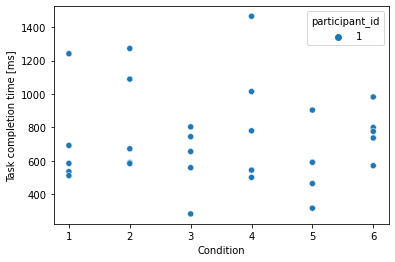

In [16]:
scatter_plot = sns.scatterplot(
    data = correct_clicks[correct_clicks[POINTER_TYPE] == POINTER_NORMAL],
    x = CONDITION,
    y = TASK_COMPLETION_TIME,
    hue = PARTICIPANT_ID,
    )
scatter_plot.set(xlabel = CONDITION_LABEL, ylabel = TASK_COMPLETION_TIME_LABEL)
plt.show()

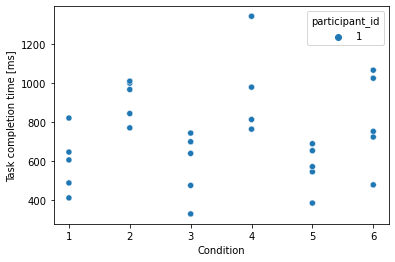

In [17]:
scatter_plot = sns.scatterplot(
    data = correct_clicks[correct_clicks[POINTER_TYPE] == POINTER_NOVEL],
    x = CONDITION,
    y = TASK_COMPLETION_TIME,
    hue = PARTICIPANT_ID,
    )
scatter_plot.set(xlabel = CONDITION_LABEL, ylabel = TASK_COMPLETION_TIME_LABEL)
plt.show()

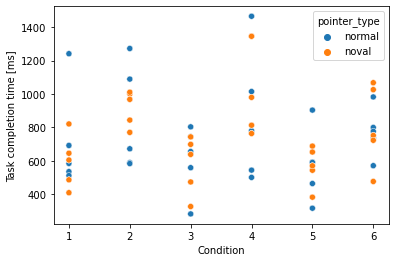

In [18]:
scatter_plot = sns.scatterplot(
    data = correct_clicks,
    x = CONDITION,
    y = TASK_COMPLETION_TIME,
    hue = POINTER_TYPE
    )
scatter_plot.set(xlabel = CONDITION_LABEL, ylabel = TASK_COMPLETION_TIME_LABEL)
plt.show()

## Swarm plots

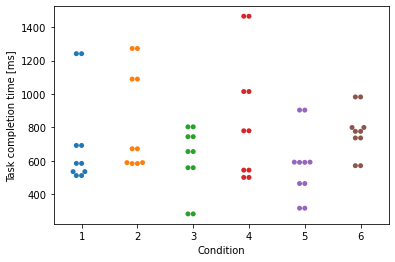

In [19]:
swarm_plot = sns.swarmplot(
    data = correct_clicks[correct_clicks[POINTER_TYPE] == POINTER_NORMAL],
    y = TASK_COMPLETION_TIME,
    x = CONDITION,
)
swarm_plot.set(xlabel = CONDITION_LABEL, ylabel = TASK_COMPLETION_TIME_LABEL)

plt.show()

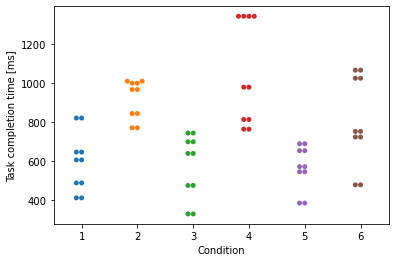

In [20]:
swarm_plot = sns.swarmplot(
    data = correct_clicks[correct_clicks[POINTER_TYPE] == POINTER_NOVEL],
    y = TASK_COMPLETION_TIME,
    x = CONDITION,
)
swarm_plot.set(xlabel = CONDITION_LABEL, ylabel = TASK_COMPLETION_TIME_LABEL)

plt.show()

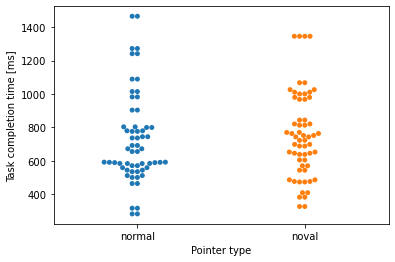

In [21]:
swarm_plot = sns.swarmplot(
    data = correct_clicks,
    y = TASK_COMPLETION_TIME,
    x = POINTER_TYPE,
)
swarm_plot.set(xlabel = POINTER_LABEL, ylabel = TASK_COMPLETION_TIME_LABEL)

plt.show()

## Boxplot

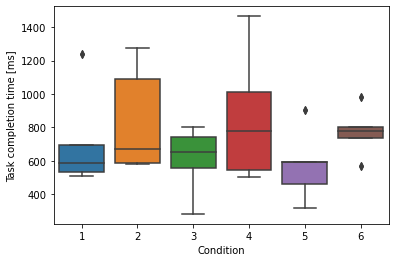

In [22]:
box_plot = sns.boxplot(
    data = correct_clicks[correct_clicks[POINTER_TYPE] == POINTER_NORMAL],
    x = CONDITION,
    y = TASK_COMPLETION_TIME
)

box_plot.set(xlabel = CONDITION_LABEL, ylabel = TASK_COMPLETION_TIME_LABEL)

plt.show()

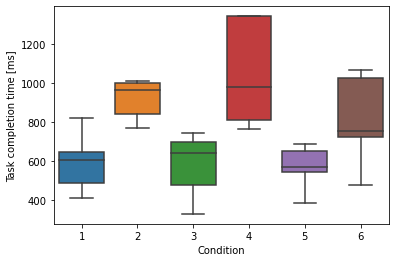

In [23]:
box_plot = sns.boxplot(
    data = correct_clicks[correct_clicks[POINTER_TYPE] == POINTER_NOVEL],
    x = CONDITION,
    y = TASK_COMPLETION_TIME
)

box_plot.set(xlabel = CONDITION_LABEL, ylabel = TASK_COMPLETION_TIME_LABEL)

plt.show()

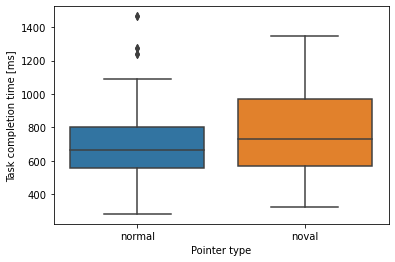

In [24]:
box_plot = sns.boxplot(
    data = correct_clicks,
    x = POINTER_TYPE,
    y = TASK_COMPLETION_TIME
)

box_plot.set(xlabel = POINTER_LABEL, ylabel = TASK_COMPLETION_TIME_LABEL)

plt.show()

## T-test

In [25]:
from scipy.stats import ttest_ind, linregress

In [26]:
pg.homoscedasticity(data=correct_clicks, dv=TASK_COMPLETION_TIME, group=POINTER_TYPE, method="bartlett")

,T,pval,equal_var
bartlett,0.257552,0.611807,True


In [27]:
pg.normality(data=correct_clicks, dv=TASK_COMPLETION_TIME, group=POINTER_TYPE)

,W,pval,normal
normal,0.915440,0.000505,False
noval,0.953121,0.021889,False


In [28]:
pg.welch_anova(data=correct_clicks, dv=TASK_COMPLETION_TIME, between=POINTER_TYPE)

,Source,ddof1,ddof2,F,p-unc,np2
0,pointer_type,1,117.483939,0.244459,0.621927,0.002067


## Results
For "novel", the average task completion time is slightly lower (M =  ms, SD = , n=) than for "normal" (M = , SD = , n=). The boxplot visualises these results. Moreover, in the plot we can identify ... outliers
# TODO: summary statistics and visualizations that show whether the initial hypotheses seem to be correct.
A Welch-Anova-test show that the differences between the two pionting techniques are over significant (t() = , p < 0,001). According to Cohen (2013) defining .01 as a small effect, .06 as a medium effect and .14 as a large effect, we have a small effect ($\eta²$ = ). This implies that there are small differences regarding the reaction time between the two conditions and the hypothesis is confirmed.


__Source:__ Cohen, J. (2013). Statistical power analysis for the behavioral sciences. Academic press.

## Discussion
